In [3]:
import tushare as ts
import pandas as pd
import os
import yaml
FILE_ROOT = os.getcwd()


In [6]:
for file in filter(lambda x: x.endswith('.yaml'), os.listdir(FILE_ROOT)):
    config = yaml.load(open(os.path.join(FILE_ROOT, file), 'rb'), Loader=yaml.FullLoader)
    
ts.set_token(config["ts_token"])

pro = ts.pro_api()

In [7]:
df = pro.query('daily', ts_code='600519.SH', start_date='20200101', end_date='20211217')

df.index=pd.to_datetime(df['trade_date'])
df=df.sort_index()

<Axes: title={'center': 'Moving average(MA) lines of 600519.SH'}, xlabel='date', ylabel='price'>

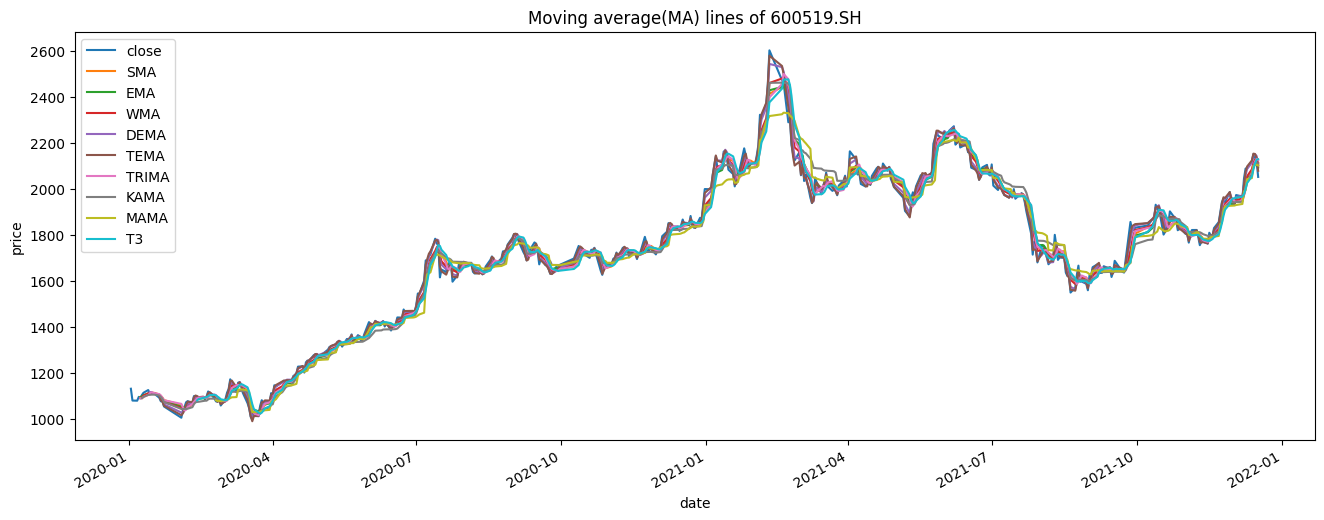

In [9]:
import talib as ta

# MA
types=['SMA','EMA','WMA','DEMA','TEMA','TRIMA','KAMA','MAMA','T3']
df_ma=pd.DataFrame(df.close)
for i in range(len(types)):
    df_ma[types[i]]=ta.MA(df.close,timeperiod=5,matype=i)

df_ma.plot(figsize=(16,6),title='Moving average(MA) lines of 600519.SH', 
           xlabel='date', ylabel='price')


<Axes: title={'center': 'Exponential Moving Average(EMA) lines'}, xlabel='date', ylabel='price'>

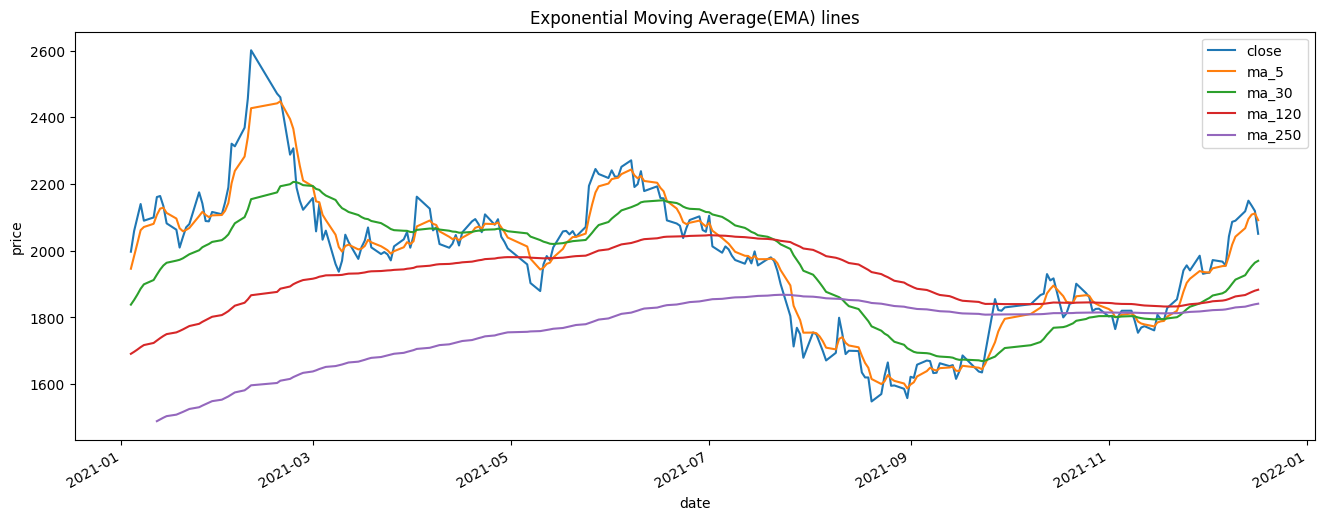

In [10]:
# EMA
N=[5,30,120,250]
for i in N:
    df['ma_'+str(i)]=ta.EMA(df.close,timeperiod=i)

df.loc['2021-01-01':,['close','ma_5','ma_30','ma_120','ma_250']].plot(figsize=(16,6),title='Exponential Moving Average(EMA) lines', xlabel='date', ylabel='price')


<Axes: title={'center': 'Bollinger Bands'}, xlabel='date', ylabel='price'>

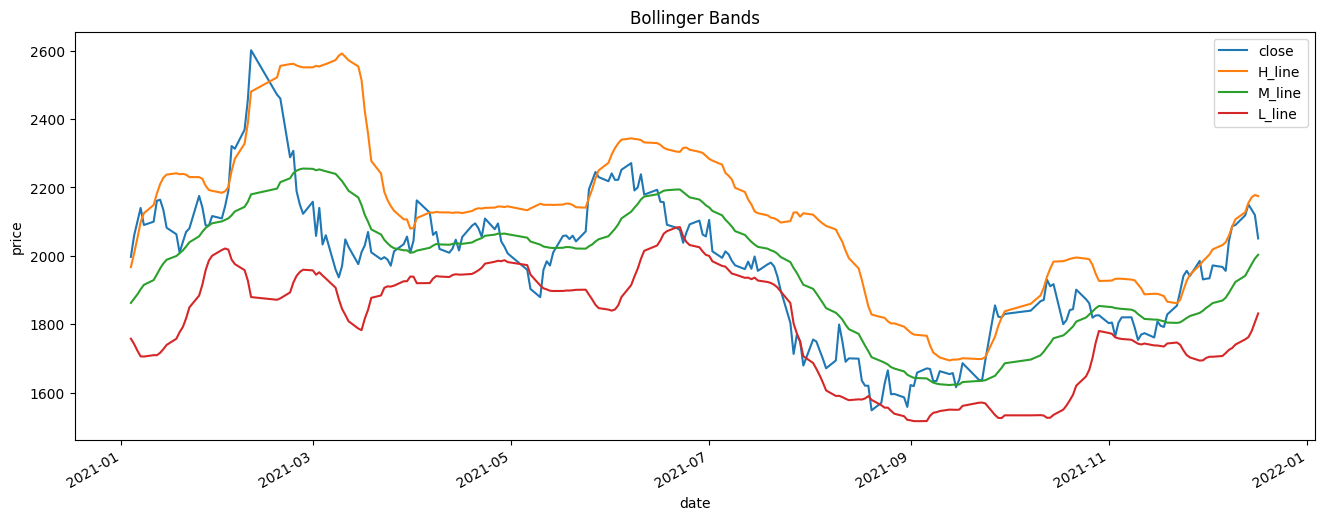

In [11]:
# BBANDS
H_line,M_line,L_line=ta.BBANDS(df.close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df1=pd.DataFrame(df.close,index=df.index,columns=['close'])
df1['H_line']=H_line
df1['M_line']=M_line
df1['L_line']=L_line

df1.loc['2021-01-01':].plot(figsize=(16,6),title='Bollinger Bands', xlabel='date', ylabel='price')

Text(0, 0.5, 'OBV')

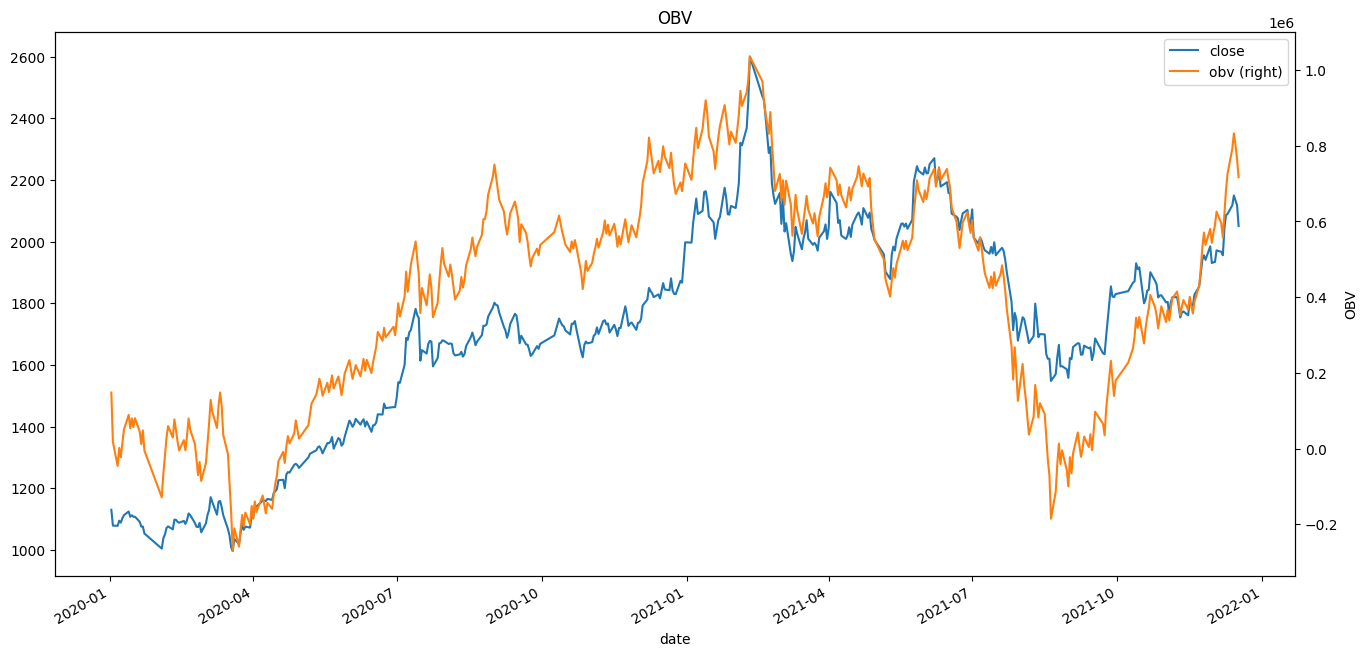

In [12]:
obvta = ta.OBV(df['close'], df['vol'])
obv=[]
for i in range(0,len(df)):
    if i == 0:
        obv.append(df['vol'].values[i])
    else:
        if df['close'].values[i]>df['close'].values[i-1]:
            obv.append(obv[-1]+df['vol'].values[i])
        if df['close'].values[i]<df['close'].values[i-1]:
            obv.append(obv[-1]-df['vol'].values[i])
        if df['close'].values[i]==df['close'].values[i-1]:
            obv.append(obv[-1])
df['obv'] = obv
ax1 = df[["close","obv"]].plot(secondary_y=['obv'],figsize=(16,8),title='OBV',xlabel='date', ylabel='price')
ax1.right_ax.set_ylabel('OBV')